# Lecture 6 and 7: Solidifying PyTorch Fundamentals
## Tensors 
We use them to encode the inputs and outputs of a model, the model parameters. 

Tensors can run on GPUs or other specialized hardware to accelerate computing. 

In [ ]:

import torch
import numpy as np

# Tensor initialization
# 1. Directly from data
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
# 2. From a NumPy array (and vice versa)
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
# 3. From another tensor: Retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden
x_ones = torch.ones_like(x_data) 
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

# 4. With random or constant values
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")



## Tensor Attributes
Describe their shape, datatype, and the device on which they are stored. 
tensor = torch.rand(3,4)

In [ ]:
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

## Tensor operations
Transposing, indexing, slicing, mathematical operations, linear algebra, random sampling, etc. Each of them can be run on the GPU (at typically higher speeds than on a CPU).


In [ ]:
# We move out tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
    print(f"Device tensor is stored on: {tensor.device}")
# Standard numpy-like indexing and slicing:
tensor = torch.ones(4, 4)
tensor[:,1]=0
print(tensor)
# Joining tensors: torch.cat to concatenate a sequence of tensors along a given dimension. Or torch.stack
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)
# Multiplying tensors 
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")

# Alternative syntax
print(f"tensor * tensor \n {tensor * tensor}")
# Compute the matrix multiplication between two tensors
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")   

# Alternative syntax
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")
# In-place operations: That have a _ suffix are in-place. For example: x.copy_(y), x.t_(), will change x.
print(tensor, "\n")
tensor.add_(5)
print(tensor)


In-place operations save some meory, but can be problematic when computing derivatives because of an immediate loss of history, their use is discouraged. 

# Bridge with NumPy
Tensors on the CPU and NumPy can share their underlying memory locations and changing one will change the other. 



In [ ]:

## Tensor to NumPy array
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")
# A change in the tensor reflects in the NumPy array
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

## NumPy array to Tensor
n = np.ones(5)
t = torch.from_numpy(n)
# Changes in the NumPy array reflects in the tensor
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")


# Exercises


In [ ]:
# 1. Create a tensor from the nested list [[5, 3], [0, 9]]
data = [[5, 3], [0, 9]]
x_data = torch.tensor(data)

# 2. Create a tensor t of shape (5, 4) with random numbers from a uniform distribution on the inverval [0, 1)
t = torch.rand((5, 4))

# 3. Find out which device the tensor t is on and what its datatype is
print(f"Device tensor is stored on: {t.device}")
print(f"Datatype of tensor: {t.dtype}")

# 4. Create two random tensors of shape (4,4) and (4, 4) called u and v respectively. Join them to make a tensor of shape (8, 4)
u = torch.rand((4, 4))
v = torch.rand((4, 4))
torch.cat((u, v), dim=0)

# 5. Join u and v to make a tensor, called w of shape (4, 4, 2)
w = torch.stack((u, v), dim=2)

# 6. Index w at 3, 3, 0. Call that element e
e = w[3, 3, 0]

# 7. Which of u or v would you find w in? Verify
w[3,3,0] == u[3,3] 

# 8. Create a tensor a of ones with shape (4,3). Perform element wise multiplication of a a with itself
a = torch.ones((4, 3))
a.mul(a)

# 9. Add an extra dimension to a (a new 0th) dimension.
torch.unsqueeze(a, 0).shape

# 10. Perform a matrix multiplication of a with a transposed
a@a.T # a.matmul(a.T)

# 11. What would a.matmul(a.T) result in?
# An error, the sizes of the two tensors are not compatible

# 12. 
t = torch.ones(5)
n = t.numpy()
n[0] = 2
print(t)

# 13.
#t = torch.tensor([2., 1., 1., 1., 1.])
t.add(2)
t.add_(1)
print(n)



## Autograd and Neural Networks
### A gentle itnroduction to torch.autograd
It is PyTorch'as automatic differentiation engine that powers neural network trainng. 

#### Background
Neural Networks (NNs) are a collection of nested function that are executed on some input data. These are defined by parameters (consisting of weights and biases), stored in tensors. 

Training a NN in two steps:
1. **Forward propagation**: The NN makes its best guess about the correct output. It runs the input data through each of its functions to make this guess
2. **Backward propagation**: The NN adjusts its parameters proportionate to the error in its guess, by traversing backwards from the output, collecting the derivatives of the error with respect to the parameters of the functions (gradients) and optimizing the parameters using gradient descent. 

For example, load a pretrained resnet18 model from torchvision. Create a random data tensor to represent a single image with 3 channels, and height and width of 64, and its corresppnding label initialized to some random values. Label in pretrained models has shape (1, 1000).



In [1]:
!pip install torch
!pip install torchvision


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
from torchvision.models import resnet18, ResNet18_Weights

model = resnet18(weights = ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)
# Run the input data through the model through each of its layers to make a prediction, the forward pass
prediction = model(data) # forward pass

# Use the prediction and the label to calculate the error.
loss = (prediction - labels).sum()

# Backpropagate the error through the network. Autograd caculates and stores the gradients  each model parameter in the parameter's grad attribute
loss.backward()
# Load an optimizar, SGD with a learning rate of 0.01 and momentum of 0.9
# Register all the parameters of the model in the optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

# Call step() to initiate gradient descent. The optimizer adjusts each parameters bu its gradient stored in .grad
optim.step() 

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

## Differentiation in Autograd
How autograd collects gradients. 

In [5]:
# Create two tensors a and b with requires_grad = True. This signals to autograd that every operation on them should be tracked
import torch
a = torch.tensor([2., 3.], requires_grad = True)
b = torch.tensor([6., 4.], requires_grad = True)

# Create another tensor such that
$$
Q = 3a^3 - b^2
$$

In [6]:
Q = 3*a**3 - b**2

If a and b are parameters of an NN and Q the error. In NN training, we want gradients of the errors w.r.t parameters
$$
\frac{\partial Q}{\partial a} = 9a^2, \frac{\partial Q}{\partial b} = - 2b
$$

When we call .backward on Q, autograd calculates these gradients and stores them in the respective tensors' grad attribute.

We need to explicitly pass a gradient argument in Q.backward() because it is a vector. gradient is a tensor of the same shape as Q, and it represents the gradient of Q w.r.t. itself, i.e.
$$
\frac{dQ}{dQ} = 1
$$

We can aggregate Q into a scalar and call backward implicitly, like Q.sum().backward()

In [ ]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

# Gradients are deposited in a.grad and b.grad
print(9*a**2 == a.grad)
print(-2*b == b.grad)

## Optional Readin: Vector Calculus using autograd
If you have a vector values function $y=f(x)$, then the gradient of y with respect to x is a Jacobian matrix J
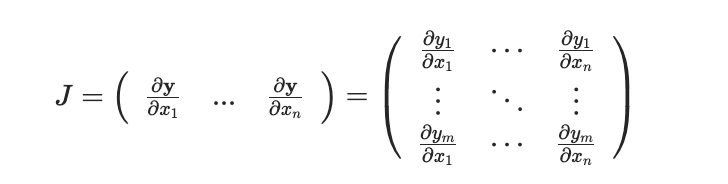

torch.autograd is an engine for computing vector-Jacobian product. Given any vector v, computes the product $J^Tv$.



If v happens to be the gradient of a scalar function $l = g(y)$

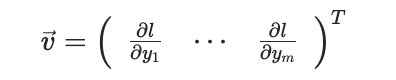

By the chain rule, the vector Jacobien product would be the gradient of l with respect to x
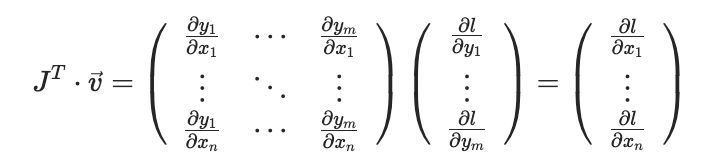

This characteristic of vector-Jacobian product is what we use in the above example, external_grad represents v. 

## Computational Graph
Autograd keeps a record of data (tensors) and all executed operations (along with the resultings new tensors) in a directed acyclic graph (DAG) consisting of function objects. In it, leaves are the input tensors, roots are the output tensors. By tracking the graph from root to leaves, you can automatically compute the gradients using the chain rule. 

In a forward pass, autograd does 2 things simultaneously
* Run the requested operation to compute a resulting tensor
* Maintain the operation's gradient function in the DAG

The backward pass kicks off when .backward() is called on the DAG root. autograd then
* Computes the gradients from each .grad_fn
* Accumulates them in the respective tensor's .grad attribute 
* Using the chain rule, propagates all the way to the leaf tensors


The arrows are in the direction of the forward pass. The nodes represent the backward functions of each operation in the forward pass. The leaf nodes in blue represent our leaf tensors a and b.

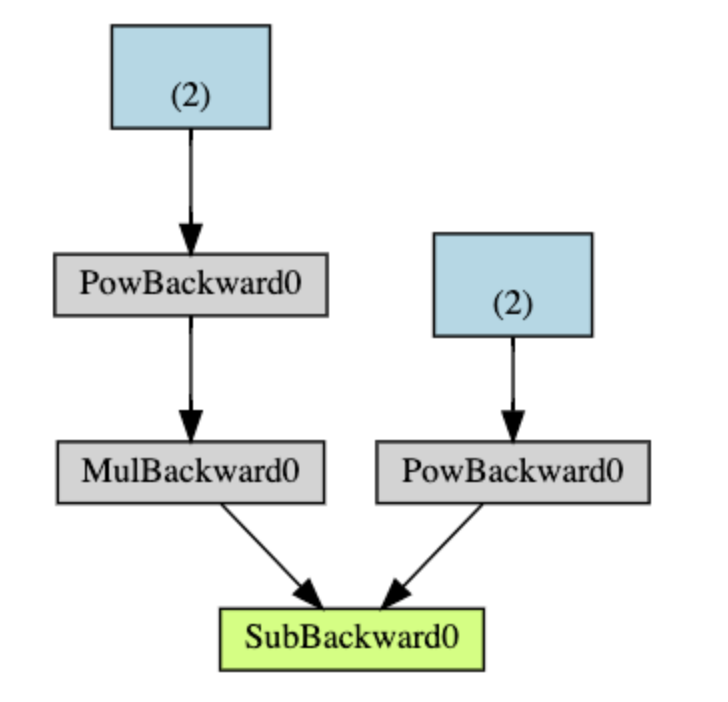

DAGs are dynamic in PyTorch: The graph is recreated from scratch, after each backward() call, autograd starts populating a new graph. This is exactly waht allows you to use control flow statements in your model, you can change the shape, size and operations at every iteration if needed. 

## Exclusion from the DAG
autograd tracks operations on all tensors which have their requires_grad = True. For tensors that don't require gradients, setting to False excludes it from the gradient computation DAG. 

The output tensor of an operation will require gradients even if only a single input tensor has requires_grad = True. 

In [11]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


In a NN, parameters that don't compute gradients are usually called frozen parameters. It is useful to freeze part of your model if you know in advance that you won't need the gradients of those parameters (performance benefits by reducing autograd computations). 

Another common usecase where exclusion from the DAG is important is for finetuning a pretrained network. We freeze most of the model and typically only modify the classifier layers to make predictions on new labels. For example, a pretrained resnet18 model and freeze all the parameters

In [12]:
from torch import nn, optim
model = resnet18(weights = ResNet18_Weights.DEFAULT)

# Freeze all the parameters in the network
for param in model.parameters():
  param.requires_grad = False

In [13]:
# If we want to finetune the model on new data with 10 labels. In resnet, the classifiers is the last linear 
# layer model.fc. We can replace it with a new linear layer (unfrozen by default) that acts as our classifier
model.fc = nn.Linear(512, 10)

Now all parameters in the model, except the ones of model.fc are frozen. 

In [14]:
# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr = 1e-2, momentum = 0.9)

Notice although we register all the parameters in the optimizer, the only parameters that are computing gradients (and hence updated in gradient descent) are the weights and bias of the classifier.



## Neural Networks
They can be constructed using the torch.nn package. nn depends on autograd to define models and differentiate them. An nn.Module contains layers, and a methods forward(input) that returns the output. 

For example a networks that classifies digit imagesd

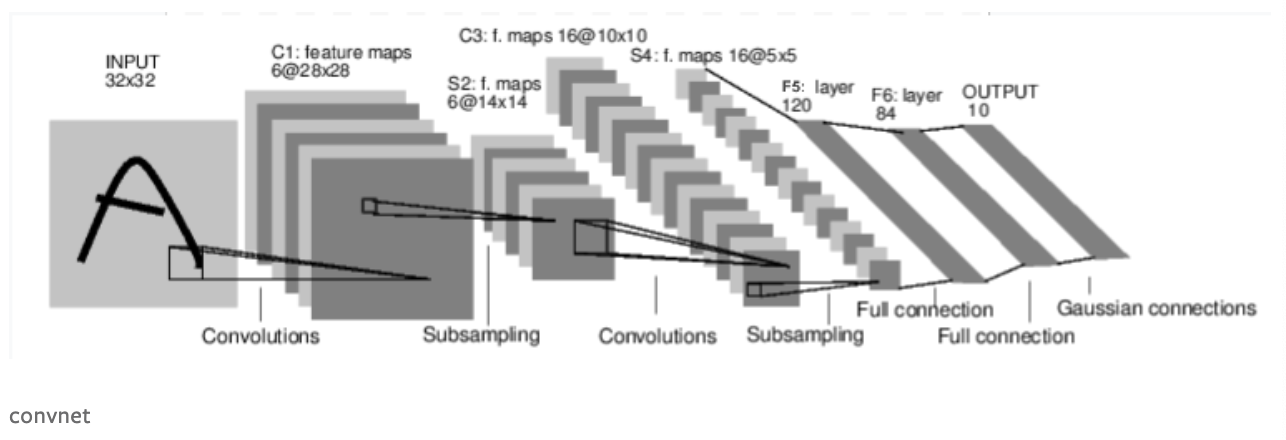

A typical training procedure for a neural networks is as follows:
* Define the NN that has some learnable parameters (or weights)
* Iterate over a datasets of inputs
* Process the input through the network
* Compute the loss (how far is the output from being correct)
* Propagate gradients back itno the network's parmaeters
* Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient 

## Define the network

In [18]:
import torch
import torch.nn 
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # 1 input image channel, 6 output channels, 5x5 square convolution
    # kernel
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)

    # An affine operation: y = Wx + b
    self.fc1 = nn.Linear(16 * 5 * 5, 120) # 5*% from image dimension
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    # max pooling over a (2,2) window
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    # If the size is a square, you can specify with a single number
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)

    x = torch.flatten(x, 1) # Flatten all dimensions except the batch dimensiom

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

  
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


The backward function (where gradients are computed) is automatically defined for you using autograd. You can use any of the Tensor operations in the forward function. The learnable parameters of a model are returned by net.parameters()


In [16]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight


10
torch.Size([6, 1, 5, 5])


In [19]:
# Try with a random 32x32 inputs (the expected input size). Resize the images from the MNIST Dataset
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0695, -0.1299, -0.0111,  0.0060,  0.0615,  0.1119, -0.0672, -0.0187,
         -0.0039,  0.0415]], grad_fn=<AddmmBackward0>)


In [20]:
# Zero the gradient buffers of all parameters and backprops with random gradients
net.zero_grad()
out.backward(torch.randn(1, 10))

torch.nn only supports mini-batches. The package torch.nn only supports inputs that are a mini abtch of samples, and not a single sample. For example, nn.Conv2d will take in a 4D Tensor of nSamples * nChannels * Height * Width

If you have a single sample, jsut use input.unsqueeze(0) to add a fake batch dimension.

Recap
* torch.Tensor: A multi-dimensional with support for autgrad operations like bacward(). Also holds the gradient w.r.t. the tensor
* nn.Module: NN module. Convenient way of encapsulating parameters, with helpers for moving them to GPU, exporting, loading, etc.
* nn.Paramter: A kind of Tensor, that is automatically registered as a parameters when assigned as an attribute to a Module
* autograd.Function: Implements forward and backward definitions of an autograd operation. Every Tensor operation creates at least a single function node that connects to functions that created a Tensor and encodes its history

## Loss function
It takes the (output, target) pair of inputs, and computes a value that estiamtes how far away the output is from the target. One is nn.MSELoss, which computes the mean-squared error between the output and the target. 



In [21]:
output = net(input)
target = torch.randn(10) # a dummy target, for example
target = target.view(1, -1) # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.8815, grad_fn=<MseLossBackward0>)


If you follow loss in the backward direction, using its .grad_fn you will see a graph of computations that looks 
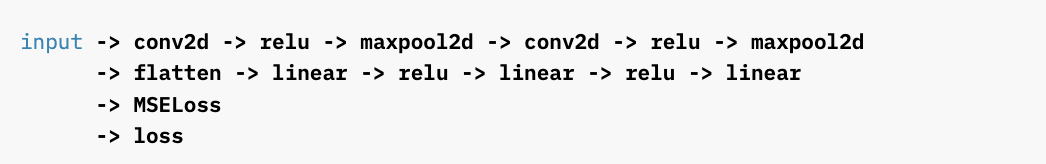

So when we call loss.Backward(), the whole graph is differentiated w.r.t. the neural net parameters and all Tensors in the graph that have requires_grad = True will have their .grad Tensor accumulated with the gradient


## Backprop
To backpropagate the error: loss.backward(). You need to lcear the existing gradients, else gradients will be accumulated to existing gradients. 



In [22]:
net.zero_grad() # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0042, -0.0058, -0.0037,  0.0052, -0.0030,  0.0033])


## Update the weights
The simples update rule used is the Stochastic Gradient Descent: weight = weight - learning_rate * gradient



In [25]:
learning_rate = 0.01
for f in net.parameters():
  f.data.sub_(f.grad.data * learning_rate)

In [27]:
# torch.optim implements different update rules
import torch.optim as optim

# Create your optimizer
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# In your training loop
optimizer.zero_grad() # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

# Exercises
Assume the foloowing starter code


In [1]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [13]:
# 1. Run a forward pass through the model with the data and save it as preds
preds = model(data)

# 2. What should the shape of preds be? (1, 1000)
preds.shape

# 3. Save the weight parameter of the conv1 attribute of resnet18 as w
w = model.conv1.weight
print(w)

# 4. What should the grad attribute for w be? Verify. None
print(w.grad)

# 5. Create a CrossEntropy loss object and use it to compute a loss using labels 
# and preds, saved as loss. Print loss
ce = torch.nn.CrossEntropyLoss()
loss = ce(labels, preds)
print(loss)

# 6. Print the last mathematical operation that created loss
print(loss.grad_fn)

# 7. Perform the backward pass
loss.backward()

# 8. Should w have changed? No
print(w)

# 9. Will the grad attribute for w be different? Verify. Yes
print(w.grad)



Parameter containing:
tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
            1.7083e-02, -1.2694e-02],
          [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
           -1.2907e-01,  3.7424e-03],
          [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
            2.5632e-01,  6.3573e-02],
          ...,
          [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
           -4.2058e-01, -2.5781e-01],
          [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
            3.9359e-01,  1.6606e-01],
          [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
           -8.2230e-02, -5.7828e-03]],

         [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
            6.6221e-04, -2.5743e-02],
          [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
           -1.6051e-01, -1.2826e-03],
          [-8.3730e-04,  9.8420e-02,  4.0210e-01,  ...,  7.0789e-01,
            3.6887e-01,  1.2455e-01]

In [16]:
# 10. What should grad attribute for loss return for you? Verify
# None because loss is not a leaf node, and we hadn’t set loss.retain_grad(), 
# which enables a non-leaf Tensor to have its grad populated during backward().

# 11. What should the requires_grad attribute for loss be? Verify. True
print(loss.requires_grad) # True

# 12. What should requires_grade for labels be? Verify
print(labels.requires_grad)

# 13. What will happen if you perform the backward pass again
# Runtime Error because saved intermediate values of the graph are freed when we 
# call .backward() the first time if we don’t specify retain_graph=True.

# 14. Create an SGD optimizer object iwth lr=1e-2 and momentum=0.9
sgd = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
sgd.step() 

# 15. Should w have changed? Yes, the step modifies the parameters. 

# 16. Should loss have changed? 
# No (because it’s not a parameter that is part of model parameters)

# 17. Zero the gradients for all trainable parameters
model.zero_grad()

# 18. What should the grad attribute for w be? Verify. Zero

# 19. Determine, without running, whether te following code will succesfully exsecute
data1 = torch.zeros(1, 3, 64, 64)
data2 = torch.ones(1, 3, 64, 64)

predictions1 = model(data1)
predictions2 = model(data2)

l = torch.nn.CrossEntropyLoss()
loss1 = l(predictions1, labels)
loss2 = l(predictions2, labels)

loss1.backward()
loss2.backward()

# Yes! loss2.backward() wouldn’t work when intermediate values of the graph are 
# freed; however, we are not using the same intermediate values for loss2, 
# so it will work.

# 20. Determine whether the following code will successfully execute

"""
data1 = torch.zeros(1, 3, 64, 64)
data2 = torch.ones(1, 3, 64, 64)

predictions1 = model(data1)
predictions2 = model(data2)

l = torch.nn.CrossEntropyLoss()
loss1 = l(predictions1, labels)
loss2 = l(predictions1, labels)

loss1.backward()
loss2.backward()
"""
# No! loss2.backward() won’t work when intermediate values of the graph are freed; 
# here, predictions1 will have been freed.

# 21. For one(s) that don’t execute, how might you modify one of the .backward 
# lines to make it work? 
# Change the first .backward() call to use retain_graph=True

data1 = torch.zeros(1, 3, 64, 64)
data2 = torch.ones(1, 3, 64, 64)

predictions1 = model(data1)
predictions2 = model(data2)

l = torch.nn.CrossEntropyLoss()
loss1 = l(predictions1, labels)
loss2 = l(predictions1, labels)

loss1.backward(retain_graph=True)
loss2.backward()




True
False


In [17]:
# 22. What will the output of the following code?

predictions1 = model(data)
l = torch.nn.CrossEntropyLoss()
loss1 = l(predictions1, labels)
loss1.backward(retain_graph=True)

w = model.conv1.weight.grad[0][0][0][0]
a = w.item()

loss1.backward()
b = w.item()

model.zero_grad()
c = w.item()

print(b//a,c)



1.0 0.0


In [18]:

predictions1 = model(data)
l = torch.nn.CrossEntropyLoss()
loss1 = l(predictions1, labels)
loss1.backward(retain_graph=True)

a = model.conv1.weight.grad[0][0][0][0]

loss1.backward()
b = model.conv1.weight.grad[0][0][0][0]

model.zero_grad()
c = model.conv1.weight.grad[0][0][0][0]

print(b//a,c)



tensor(nan) tensor(0.)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  


In [ ]:
# 23. What is wrong with the following code?
learning_rate = 0.01
for f in net.parameters():
  f.data.sub(f.grad.data * learning_rate)
# The sub call should be sub_, which will correctly perform the expected in-place operation.

# 24. Order the following steps of the training loop correctly (there 
# are multiple correct answers, but one typical setup that you would have seen in this tutorial)
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()

# 25. What will be the output of the following code?

net = resnet18(weights=ResNet18_Weights.DEFAULT)
data = torch.rand(1, 3, 64, 64)
target = torch.rand(1, 1000)
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()
orig = net.conv1.weight.clone()[0, 0, 0, 0]
weight = net.conv1.weight[0, 0, 0, 0]
# 1
optimizer.zero_grad()
print(f"{weight == orig}")

# 2
output = net(data)
loss = criterion(output, target)
print(f"{weight == orig}")

# 3
loss.backward()
print(f"{weight == orig}")

# 4
optimizer.step()
print(f"{weight == orig}")


# True
# True
# True
# False

In [ ]:
# 26. Implement a neural network with one hidden layer. It will take in a grayscale 
# image input of 32x32, flatten it, run it through an affine transformation with 
# 100 out_features, apply a relu non-linearity, and then map onto the target classes.
# Implemente the initialization and the forward pass completing the following piece 
# of code

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  super(Net, self).__init__()
  self.fc1 = nn.Linear(32 * 32, 100)
  self.fc2 = nn.Linear(100, 10)

  def __init__(self):
      super(Net, self).__init__()
      self.fc1 = nn.Linear(32 * 32, 100)
      self.fc2 = nn.Linear(100, 10)
      
  def forward(self, x):
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

# 27. Using two lines of code, verify that you're able to do a forward pass through
# the above network

net = Net()
preds = net.forward(torch.randn(1, 1, 32, 32))



In [ ]:
# 27. Without running the code, guess what would the following statement yield
net = Net()
print(len(list(net.parameters())))
# 4

# 28. What network layer is the following statement referring to? What will it evaluate to?
print(list(net.parameters())[1].size())
# Fc1.bias. torch.Size([100])

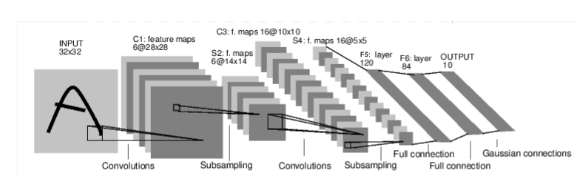

In [ ]:
# 29. The following schematic has all of the information you need to implement a neural 
# network. Implement the initialization and the forward pass completing the 
# following pieces of code. Use nn.Conv2d, nn.Linear, F.max_pool2d, F.relu, 
# torch.flatten. Hint: the ReLUs are applied after the subsampling operations 
# and after the first two fully connected layers.

import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # your code here
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x



# Training a classifier
## What about data
Generally, you can use standard python packages that load data into a numpy array. Then you can convert this array into a torch.Tensor.
* For images, packages such as Pillow, OpenCV are useful
* For audio, scipy and librosa
* For text, either raw Python or Cython based loading, or NLTK adn SpaCy

For vision, torchvision, taht has data loaders for common datasets and data transformers. 

Steps:
1. Load an normalize the CIFAR10 training and test datasets

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

2. Define a Convolutional Neural Network


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

3. Define a loss function and optimizer



In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

4. Train the nerwork
Loop over our data iterator, and feed the inputs to the network and optimize


In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

In [ ]:
# Save the trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

5. Test the network on the test data
If the prediction is correct, we add the sample to the list of correct predictions.


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
# Load back the saved model
net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

The outputs are the energies for the 10 classes. The higher the energy for a class, the more the network thinks that the image is of the particular class. Get the index of the highest energy. 



In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

In [ ]:
# How the network performs on the whole dataset
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [ ]:
# what are the classes the performed well and the classes that did not perform well
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

# Training on GPU
Transfer the neural net onto the GPU. Define our device as the first visible cuda device if we have CUDA available

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

Then these methods will recursively go over all modules and convert their parameters and buffers to CUDA tensors:



In [ ]:
net.to(device)


Remember that you will have to send the inputs and targets at every step to the GPU too:



In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)


# Exercises

The following dataset loading code runs but are there mistakes in the following code? What are the implications of the errors? What are the fixes? 


In [ ]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose(
   [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=True,
                                      download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, num_workers=2)



There are two mistakes. First, we’re not shuffling the train data loader. Second, we’re loading up the CIFAR train data in the testset, and the CIFAR test set in the train set.


Write 2 lines of code to get random training images from the dataloader (assuming errors above are fixed).


In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)



The following training code runs but are there mistakes in the following code (mistakes include computational inefficiencies)? What are the implications of the errors? What are the fixes? 


In [ ]:
 running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
            break


There are two mistakes. First, there should be an optimizer.zero_grad() in the loop. Without this, the gradients will accumulate. Second, running_loss should be incremented using loss.item(); otherwise, each loss will still be part of the computational graph; this takes up memory, as the individual losses would have otherwise been garbage-collected.


The following evaluation code runs but are there mistakes in the following code (mistakes include computational inefficiencies)? What are the implications of the errors? What are the fixes? 


In [ ]:

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
for data in testloader:
    images, labels = data
    # calculate outputs by running images through the network
    outputs = net(images)
    # the class with the highest energy is what we choose as prediction
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')



There are two mistakes. First, there should be a torch.no_grad() encapsulating the loop; this will deactivate the autograd engine, reducing memory usage and speed up computations but you won’t be able to backprop (which you don’t want in an eval script). Second, once again, we’re missing the .item() call after the sum(), which would mean that we would have the tensor(s) be part of the computational graph, eating memory.
